In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

random graph

https://www.youtube.com/watch?v=flwcAf1_1RU

In [3]:
G = nx.barabasi_albert_graph(100,2)

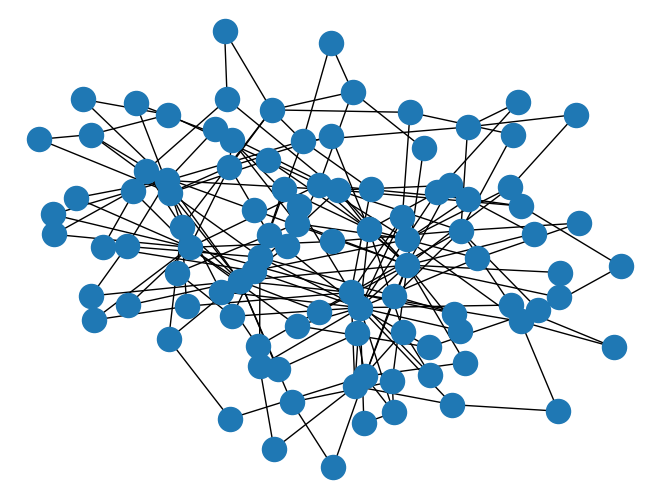

In [4]:
nx.draw_spring(G);

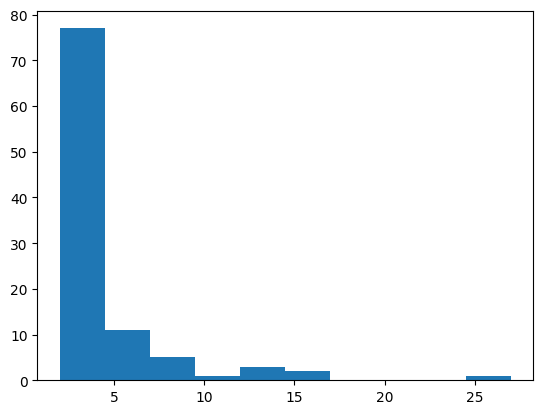

In [99]:
plt.hist([v for k,v in nx.degree(G)]);

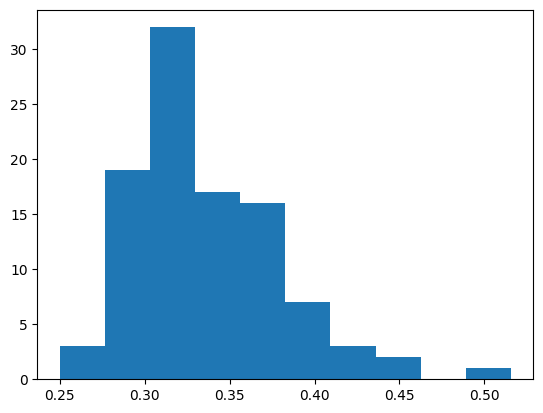

In [100]:
plt.hist(nx.centrality.closeness_centrality(G).values());

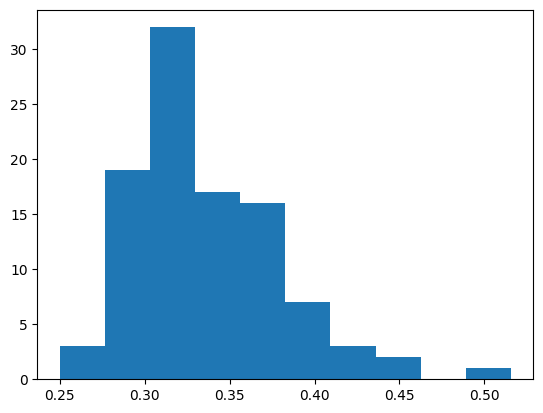

In [101]:
plt.hist(nx.centrality.closeness_centrality(G).values());


In [102]:
nx.diameter(G)

6

In [103]:
nx.cluster.average_clustering(G)


0.16491023791023793

In [104]:
nodes = list(range(100))

df = pd.DataFrame({'from': np.random.choice(nodes, 100),
                   'to': np.random.choice(nodes,100)
                  })

In [105]:
df

,from,to
0,13,83
1,43,67
2,30,33
3,49,70
4,14,44
...,...,...
95,22,32
96,81,87
97,98,1
98,4,2


In [106]:
G = nx.from_pandas_edgelist(df, source='from', target='to')

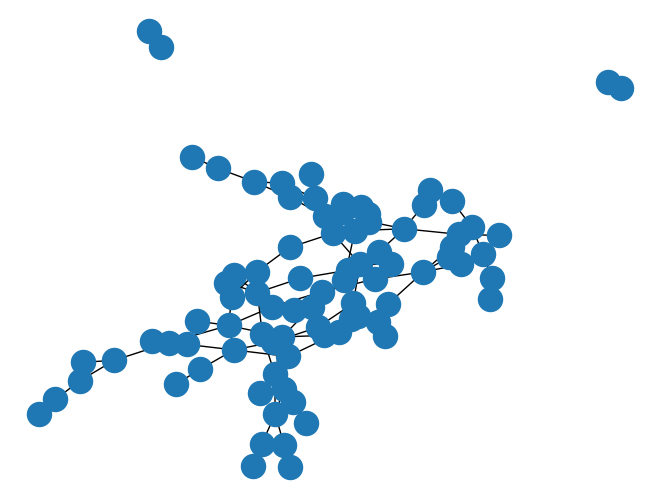

In [107]:

nx.draw(G);

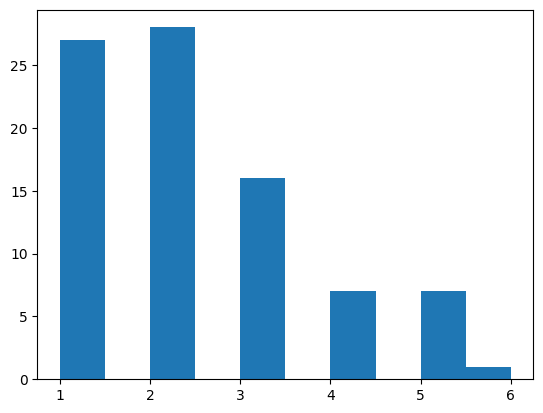

In [108]:
plt.hist([v for k,v in nx.degree(G)]);

In [109]:

import random
import pandas as pd

class Node:
    def __init__(self, value=None, children=None):
        self.value = value
        self.children = children or []

def generate_random_tree(level):
    root_value = random.randint(0, 100)
    root = Node(root_value)
    stack = [(root, level)]
    edges = []

    while stack:
        node, level = stack.pop()

        if level > 0:
            num_children = random.randint(0, 3)
            children = [Node(random.randint(0, 100)) for _ in range(num_children)]
            node.children = children

            for child in children:
                edges.append((node.value, child.value))
                stack.append((child, level-1))

    return root, edges

def get_edges_df(root):
    node, edges = root
    edges_df = pd.DataFrame(edges, columns=["from", "to"])
    return edges_df

# example usage:
root = generate_random_tree(3)
edges_df = get_edges_df(root)
print(edges_df)


    from  to
0     61  92
1     61  60
2     61  47
3     47  81
4     47  27
5     27  82
6     27  27
7     92  85
8     92  13
9     13  60
10    85  81


In [110]:
import random
import pandas as pd

class Node:
    def __init__(self, value=None, children=None):
        self.value = value
        self.children = children or []

def generate_random_tree(level):
    root_value = random.randint(0, 100)
    root = Node(root_value)
    stack = [(root, level)]
    edges = []

    while stack:
        node, level = stack.pop()

        if level > 0:
            num_children = random.randint(0, 3)
            children = [Node(random.randint(0, 100)) for _ in range(num_children)]
            node.children = children

            for child in children:
                edges.append((node.value, child.value))
                stack.append((child, level-1))

    return root, edges

def get_edges_df(root):
    node, edges = root
    edges_df = pd.DataFrame(edges, columns=["from", "to"])
    return edges_df


# example usage:
root = generate_random_tree(3)
edges_df = get_edges_df(root)
print(edges_df)

    from  to
0      7  71
1      7  78
2      7  76
3     76   7
4     76  46
5      7  55
6      7  17
7     78  75
8     78  74
9     78  96
10    96  74
11    96  78
12    96  85
13    74  68
14    74  97
15    74  56
16    75   7
17    75  44


In [111]:
G = nx.from_pandas_edgelist(edges_df, source='from', target='to')


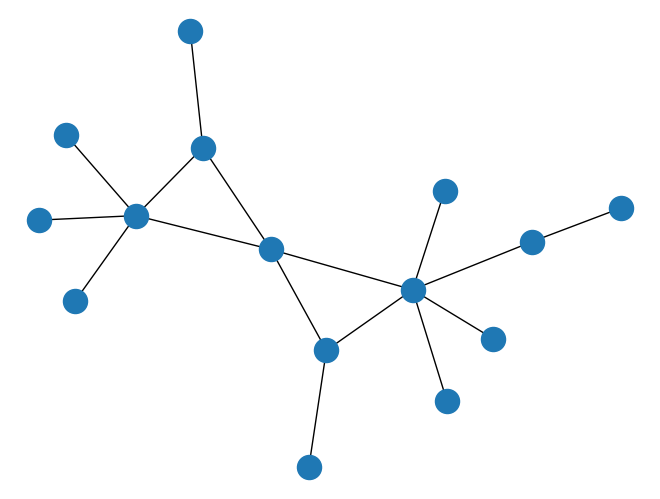

In [112]:
nx.draw(G);

Generate the tree with n nodes and depth l with labels

Children of node 0: [1, 6, 9, 12, 16, 19, 22, 26, 30, 33]


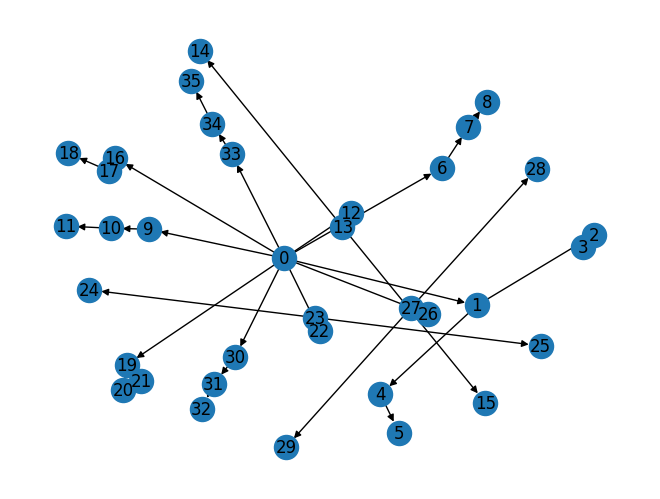

In [51]:
import networkx as nx
import random

def generate_tree_s(n_nodes, depth):
    # Create an empty graph
    G = nx.Graph()
    # Add the root node to the graph
    G.add_node(0)
    # nx.set_node_attributes(G, {0: {'label': '0'}})
    # Define a recursive function to add nodes and edges
    def add_nodes(parent, d, n_remaining):
        if d == 0 or n_remaining == 0:
            return
        # Choose a random number of branches for the current node
        n_branches = random.randint(1, n_remaining)
        # Calculate the number of nodes to assign to each branch
        branch_sizes = [n_remaining // n_branches] * n_branches
        for i in range(n_remaining % n_branches):
            branch_sizes[i] += 1
        # Add the nodes and connect them to the parent node
        for i in range(n_branches):
            j = G.number_of_nodes()
            G.add_node(j)
            G.add_edge(parent, j)
            # Recursively add children nodes
            add_nodes(j, d-1, branch_sizes[i])
    add_nodes(0, depth-1, n_nodes-1)
    # Use depth first search to find the tree structure starting from the root node
    T = nx.dfs_tree(G, source=0)
    return T

# Generate a tree structure with 10 nodes and depth 3
tree1 = generate_tree_s(20, 4)
labels1 = {n: str(n) for n in tree1.nodes()}
# Print the root node and its children
root_node1 = list(tree1.nodes())[0]
print(f"Children of node {root_node1}: {list(tree1.neighbors(root_node1))}")
nx.draw(tree1, with_labels=True, labels=labels1)

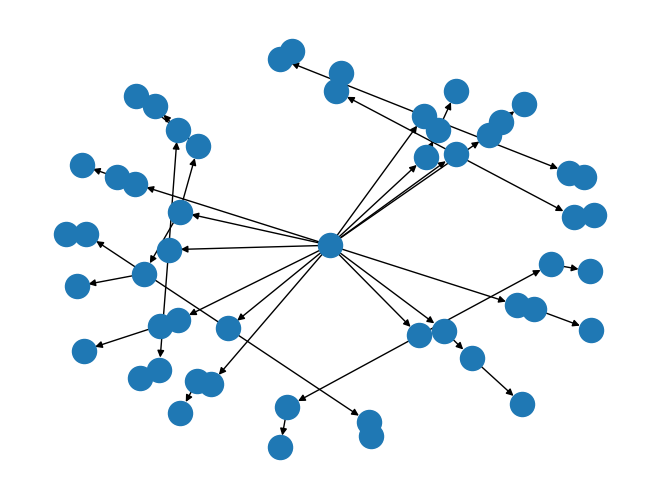

In [88]:
# nx.draw(tree);


In [84]:
import networkx as nx


def trim_tree_by_depth(G, root, max_depth):
    """
    Trims a tree up to a maximum depth from the given root node.

    Parameters
    ----------
    G : networkx.Graph or networkx.DiGraph
        The input tree to be trimmed.
    root : int
        The root node of the tree.
    max_depth : int
        The maximum depth to which the tree should be trimmed.

    Returns
    -------
    networkx.Graph or networkx.DiGraph
        The trimmed tree.
    """
    # wo direction
    # H = nx.Graph() if isinstance(G, nx.Graph) else nx.DiGraph()
    # w direction
    H = nx.DiGraph() if isinstance(G, nx.DiGraph) else nx.Graph()
    H.add_node(root)
    if max_depth == 0:
        return H
    for child in G.neighbors(root):
        H.add_edge(root, child)
        trim_tree_by_depth_recursive(G, child, H, max_depth, 1)
    return H


def trim_tree_by_depth_recursive(G, node, H, max_depth, curr_depth):
    """
    Recursive function to trim a tree up to a maximum depth.

    Parameters
    ----------
    G : networkx.Graph or networkx.DiGraph
        The input tree to be trimmed.
    node : int
        The current node being processed.
    H : networkx.Graph or networkx.DiGraph
        The resulting trimmed tree.
    max_depth : int
        The maximum depth to which the tree should be trimmed.
    curr_depth : int
        The current depth of the node.

    Returns
    -------
    None
    """
    if curr_depth == max_depth:
        return
    for child in G.neighbors(node):
        # wo direction
        H.add_edge(node, child)
        # w direction
        H.add_edge(node, child, **G.get_edge_data(node, child))
        trim_tree_by_depth_recursive(G, child, H, max_depth, curr_depth+1)


In [94]:
T = generate_tree(10, 4)
max_depth=3
if not nx.is_weakly_connected(T):
    for nodes in nx.weakly_connected_components(G):
        T = trim_tree_by_depth(G.subgraph(nodes), root, max_depth)
else:
    T = trim_tree_by_depth(T, 0, max_depth)

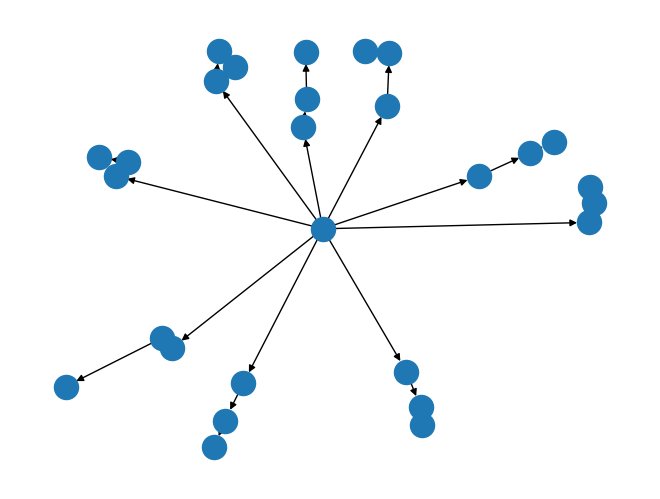

In [95]:
nx.draw(T);

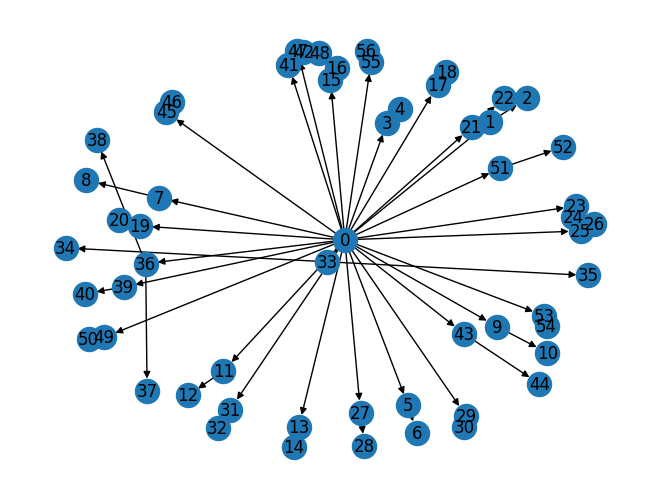

In [79]:
import networkx as nx
import random

def generate_tree(n_nodes, depth):
    # Create an empty graph
    G = nx.DiGraph()
    # Add the root node to the graph
    G.add_node(0)
    nx.set_node_attributes(G, {0: {'label': '0'}})
    # Define a recursive function to add nodes and edges
    def add_nodes(parent, d, n_remaining):
        if d == 0 or n_remaining == 0:
            return
        # Choose a random number of branches for the current node
        n_branches = random.randint(1, n_remaining)
        # Divide the remaining nodes among the branches
        branch_sizes = [1] * n_branches
        while sum(branch_sizes) < n_remaining:
            branch_sizes[random.randint(0, n_branches-1)] += 1
        # Check if any branch already contains all remaining nodes
        if max(branch_sizes) >= n_remaining:
            # If so, connect the remaining nodes to the current node
            remaining_nodes = [j for j in range(G.number_of_nodes(), G.number_of_nodes()+n_remaining)]
            for j in remaining_nodes:
                G.add_node(j)
                nx.set_node_attributes(G, {j: {'label': str(j)}})
                G.add_edge(parent, j)
            return
        # Add the nodes and connect them to the parent node
        for i in range(n_branches):
            j = G.number_of_nodes()
            G.add_node(j)
            nx.set_node_attributes(G, {j: {'label': str(j)}})
            G.add_edge(parent, j)
            # Recursively add children nodes
            add_nodes(j, d-1, branch_sizes[i])
    add_nodes(0, depth-1, n_nodes-1)
    # Use depth first search to find the tree structure starting from the root node
    T = nx.dfs_tree(G, source=0)
    return T

tree = generate_tree(30, 3)
labels = {n: str(n) for n in tree.nodes()}
nx.draw(tree, with_labels=True, labels=labels)


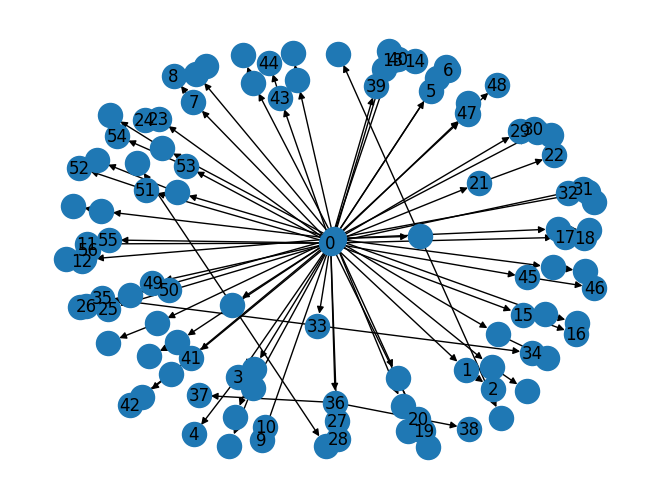

In [80]:
# tree = generate_tree(10, 4)
max_depth=3
if not nx.is_weakly_connected(T):
    for nodes in nx.weakly_connected_components(G):
        T = trim_tree_by_depth(G.subgraph(nodes), root, max_depth)
else:
    T = trim_tree_by_depth(T, 0, max_depth)


labels = {n: str(n) for n in tree.nodes()}
nx.draw(tree, with_labels=True, labels=labels)
nx.draw(tree);

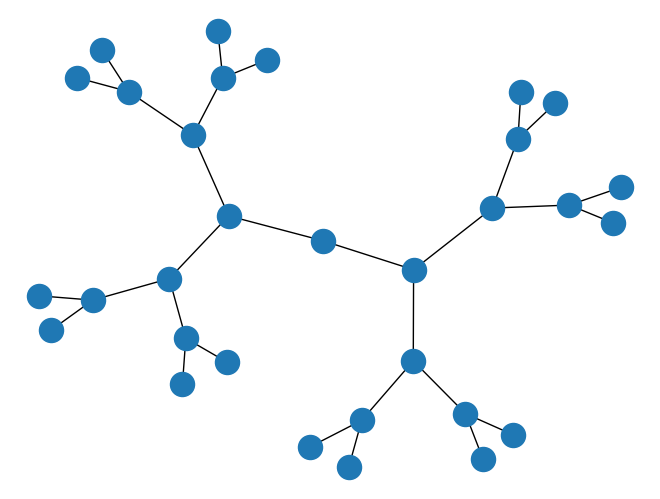

In [66]:
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pylab
branch = 2
height = 4
graph = nx.balanced_tree(branch, height)
nx.draw(graph)
# plt.show(block=True)
plt.savefig("balanced_tree_{}_height_{}_branch.png".format(height,branch), format="PNG")


In [67]:
# graph = nx.balanced_tree(2, 4)

# Create a copy of the tree with reversed edges
reversed_graph = nx.DiGraph([(v, u) for (u, v) in graph.edges()])

# # Add direction to the edges
# for node in list(reversed_graph.nodes()):
#     neighbors = list(reversed_graph.neighbors(node))
#     if len(neighbors) > 0:
#         # If the node has neighbors, add edges from the neighbors to the node
#         for neighbor in neighbors:
#             graph.add_edge(node, neighbor)
#             graph.remove_edge(neighbor, node)

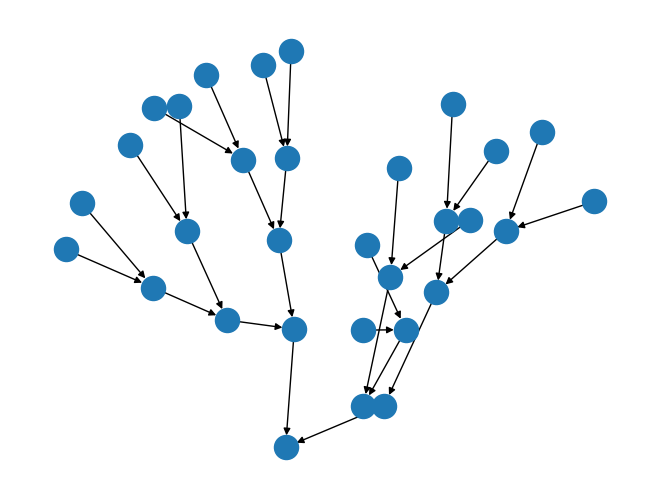

In [70]:
nx.draw(reversed_graph)
# plt.show(block=True)
plt.savefig("balanced_tree_{}_height_{}_branch.png".format(height,branch), format="PNG")

In [56]:
for node in list(graph.nodes()):
    if nx.shortest_path_length(graph, 0, node) > 3:
        graph.remove_node(node)

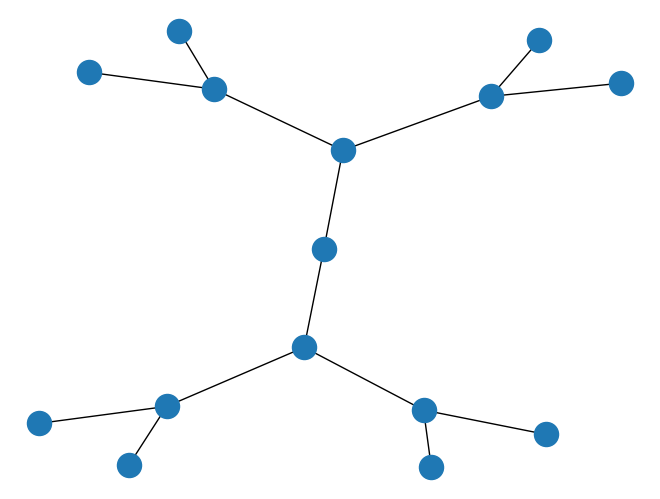

In [57]:
nx.draw(graph);
plt.savefig("balanced_tree_{}_height_{}_branch_after_trim.png".format(height,branch), format="PNG")

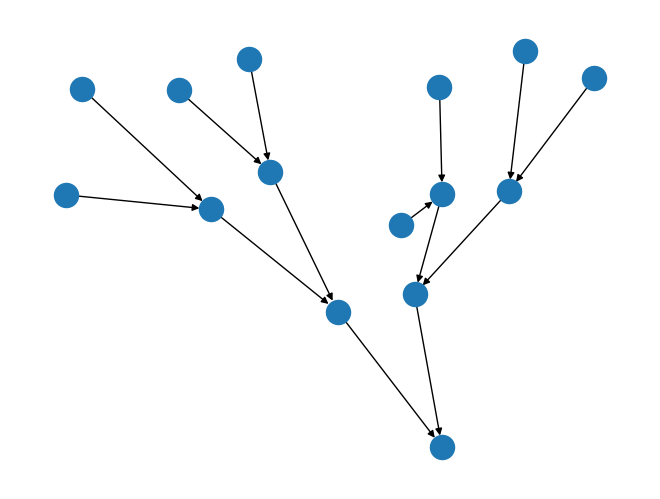

In [61]:
reversed_graph = nx.DiGraph([(v, u) for (u, v) in graph.edges()])
nx.draw(reversed_graph);

In [96]:
import networkx as nx
branch = 2
height = 3
# Create a balanced tree with 2 children per node and depth 4
graph = nx.balanced_tree(branch, height)

# Create a directed copy of the graph with reversed edges
reversed_graph = nx.DiGraph([(v, u) for (u, v) in graph.edges()])

# # Add direction to edges from leaves to root
# for node in reversed(list(nx.topological_sort(reversed_graph))):
#     for neighbor in reversed_graph.neighbors(node):
#         graph.add_edge(node, neighbor)
#         graph.remove_edge(neighbor, node)

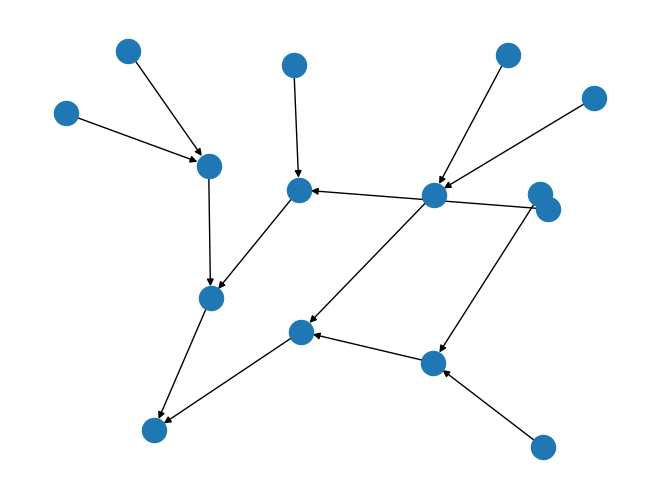

In [97]:
nx.draw(reversed_graph)
plt.savefig("balanced_tree_{}_height_{}_branch.png".format(height,branch), format="PNG")

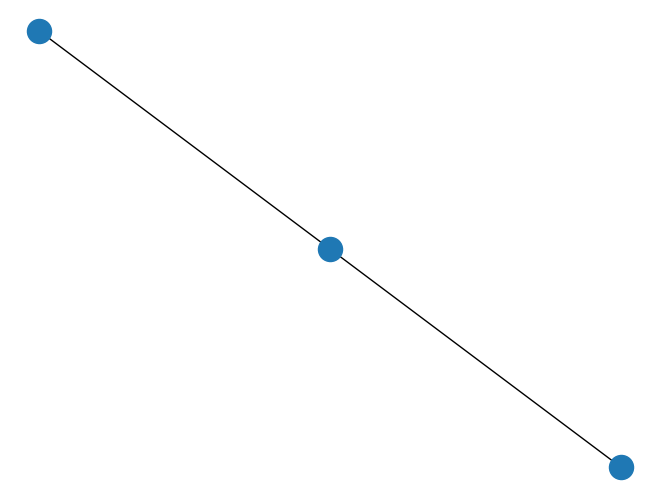

In [100]:
for node in list(graph.nodes()):
    if nx.shortest_path_length(graph, 0, node) > height -2:
        graph.remove_node(node)
nx.draw(graph);
# plt.savefig("balanced_tree_{}_height_{}_branch_after_trim.png".format(height,branch), format="PNG")

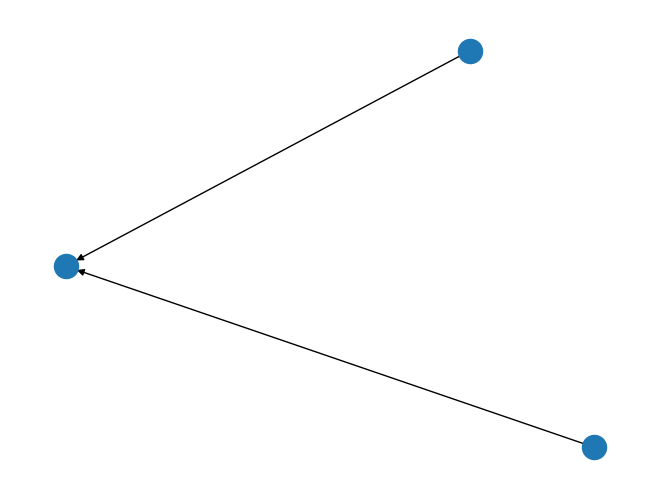

In [101]:
# Create a directed copy of the graph with reversed edges
reversed_graph = nx.DiGraph([(v, u) for (u, v) in graph.edges()])
nx.draw(reversed_graph)
plt.savefig("balanced_tree_{}_height_{}_branch_after_trim.png".format(height,branch), format="PNG")

A random k-tree may be generated from the root to the leaves, in a way that each node has a vector
with gaussian distribution of embedding elements and Y ∼ P(1) children (i.e., incoming edges), for P the
Poisson distribution, if the node is on level < k (and 0 children overwise).

In [436]:
import random
import networkx as nx
max_depth = 6
max_nodes = 300 # just for safe
G = nx.DiGraph()
# G = nx.Graph()
G.add_node(0)
current_depth = max(nx.shortest_path_length(G,0).values())
iter = 0
while current_depth <= max_depth - 1  and G.number_of_nodes() <= max_nodes - 1:
    iter += 1
    print("iter",iter)
    # current_depth = max(nx.shortest_path_length(G,0).values())
    current_depth = max(nx.shortest_path_length(G,target=0).values())
    potential_target_nodes = [x for x in G.nodes()] #  if G.degree(x)==1
    # available_nodes = [x for x in G.nodes() if G.out_degree(x)==0 and G.in_degree(x)==1]
    if potential_target_nodes == []: # if no target_node, add root as target_node
        potential_target_nodes = [0]
    print("nodes",G.nodes())
    print("current_depth",current_depth)
    print("leaves_nodes",potential_target_nodes)

    target_node = random.sample(potential_target_nodes, 1)[0]

    print("sampled leaf_node",target_node)
    Y = np.random.poisson(1)

    if  Y: # Y == 0:
        for i in range(Y+1):
            print("add node",G.number_of_nodes(),"to node",target_node)
            new_node = G.number_of_nodes()
            G.add_node(new_node)
            G.add_edge(new_node, target_node) # add edge from leaf to new node
            print(G.nodes())
        # print(G.nodes())
        # print("add node",G.number_of_nodes(),"to node",target_node)
        # new_node = G.number_of_nodes()
        # G.add_node(new_node)
        # G.add_edge(new_node, target_node) # add edge from leaf to new node
        # print(G.nodes())


iter 1
nodes [0]
current_depth 0
leaves_nodes [0]
sampled leaf_node 0
add node 1 to node 0
[0, 1]
add node 2 to node 0
[0, 1, 2]
add node 3 to node 0
[0, 1, 2, 3]
add node 4 to node 0
[0, 1, 2, 3, 4]
iter 2
nodes [0, 1, 2, 3, 4]
current_depth 1
leaves_nodes [0, 1, 2, 3, 4]
sampled leaf_node 2
iter 3
nodes [0, 1, 2, 3, 4]
current_depth 1
leaves_nodes [0, 1, 2, 3, 4]
sampled leaf_node 1
add node 5 to node 1
[0, 1, 2, 3, 4, 5]
add node 6 to node 1
[0, 1, 2, 3, 4, 5, 6]
iter 4
nodes [0, 1, 2, 3, 4, 5, 6]
current_depth 2
leaves_nodes [0, 1, 2, 3, 4, 5, 6]
sampled leaf_node 5
add node 7 to node 5
[0, 1, 2, 3, 4, 5, 6, 7]
add node 8 to node 5
[0, 1, 2, 3, 4, 5, 6, 7, 8]
iter 5
nodes [0, 1, 2, 3, 4, 5, 6, 7, 8]
current_depth 3
leaves_nodes [0, 1, 2, 3, 4, 5, 6, 7, 8]
sampled leaf_node 5
add node 9 to node 5
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
add node 10 to node 5
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
iter 6
nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
current_depth 3
leaves_nodes [0, 1, 2, 3, 4, 5, 6, 7,

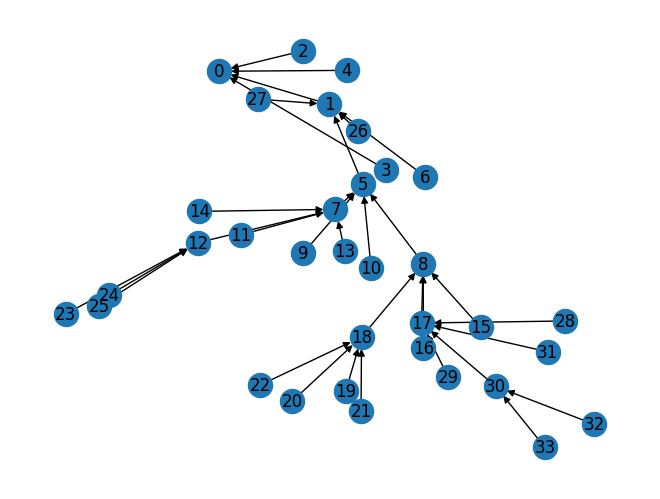

In [437]:
nx.draw(G,with_labels=True)

In [438]:
G.number_of_nodes()

34

In [439]:
depth_of_tree = max(nx.shortest_path_length(G,target=0).values())
depth_of_tree

6

In [440]:
nx.shortest_path_length(G,target=0)

{0: 0,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 2,
 6: 2,
 26: 2,
 27: 2,
 7: 3,
 8: 3,
 9: 3,
 10: 3,
 11: 4,
 12: 4,
 13: 4,
 14: 4,
 15: 4,
 16: 4,
 17: 4,
 18: 4,
 23: 5,
 24: 5,
 25: 5,
 28: 5,
 29: 5,
 30: 5,
 31: 5,
 19: 5,
 20: 5,
 21: 5,
 22: 5,
 32: 6,
 33: 6}

In [453]:
# source_indices_of_depth_path = list(pathes_length.keys())[list(pathes_length.values()).index(depth_of_tree)]
pathes_length = nx.shortest_path_length(G,target=0)
L = max_depth - 2
source_indices_of_depth_path = list()
for source, length in pathes_length.items():
    if length >= L:
        source_indices_of_depth_path.append(source)
T2 = G.copy()

if type(source_indices_of_depth_path) != list:
    source_indices_of_depth_path = [source_indices_of_depth_path]
for source in source_indices_of_depth_path:
    print(source)
    print(nx.shortest_path(G,source=source,target=0))
    shortest_path = nx.shortest_path(G,source=source,target=0)
    print(nx.shortest_path_length(G,source=source,target=0))
    # G.remove_node(shortest_path[:max_depth-L])
    # length_of_shortest_path = len(shortest_path) - 1
    length_of_shortest_path = nx.shortest_path_length(G,source=source,target=0)
    trim_path_length = length_of_shortest_path - (L - 1)
    trim_path = shortest_path[:trim_path_length]
    print("trim_path",trim_path)
    T2.remove_nodes_from(trim_path) # also remove the edge
    # G.remove_node()
    # print(nx.shortest_path(T2,source=source,target=0))
    print(max(nx.shortest_path_length(T2,target=0).values()))

11
[11, 7, 5, 1, 0]
4
trim_path [11]
6
12
[12, 7, 5, 1, 0]
4
trim_path [12]
6
13
[13, 7, 5, 1, 0]
4
trim_path [13]
6
14
[14, 7, 5, 1, 0]
4
trim_path [14]
6
15
[15, 8, 5, 1, 0]
4
trim_path [15]
6
16
[16, 8, 5, 1, 0]
4
trim_path [16]
6
17
[17, 8, 5, 1, 0]
4
trim_path [17]
5
18
[18, 8, 5, 1, 0]
4
trim_path [18]
3
23
[23, 12, 7, 5, 1, 0]
5
trim_path [23, 12]
3
24
[24, 12, 7, 5, 1, 0]
5
trim_path [24, 12]
3
25
[25, 12, 7, 5, 1, 0]
5
trim_path [25, 12]
3
28
[28, 17, 8, 5, 1, 0]
5
trim_path [28, 17]
3
29
[29, 17, 8, 5, 1, 0]
5
trim_path [29, 17]
3
30
[30, 17, 8, 5, 1, 0]
5
trim_path [30, 17]
3
31
[31, 17, 8, 5, 1, 0]
5
trim_path [31, 17]
3
19
[19, 18, 8, 5, 1, 0]
5
trim_path [19, 18]
3
20
[20, 18, 8, 5, 1, 0]
5
trim_path [20, 18]
3
21
[21, 18, 8, 5, 1, 0]
5
trim_path [21, 18]
3
22
[22, 18, 8, 5, 1, 0]
5
trim_path [22, 18]
3
32
[32, 30, 17, 8, 5, 1, 0]
6
trim_path [32, 30, 17]
3
33
[33, 30, 17, 8, 5, 1, 0]
6
trim_path [33, 30, 17]
3


In [454]:
L = max_depth - 2
L

4

In [455]:
print(max(nx.shortest_path_length(T2,target=0).values()))

3


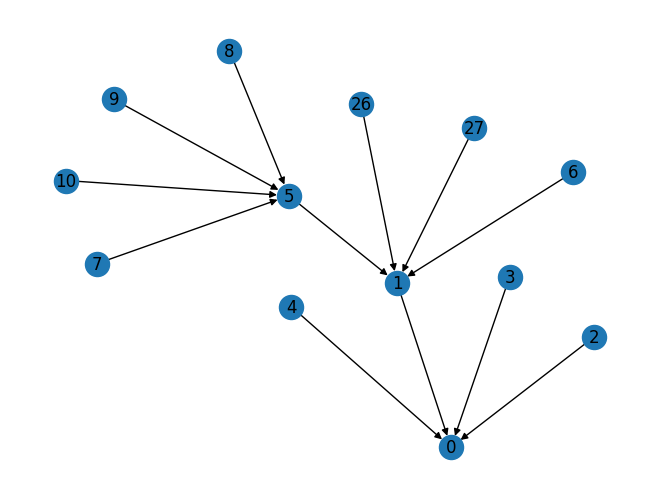

In [456]:
nx.draw(T2,with_labels=True)

In [312]:
nx.shortest_path_length(T2,target=0),T2.number_of_nodes(),max(nx.shortest_path_length(T2,target=0).values())


({0: 0,
  1: 1,
  2: 1,
  3: 1,
  5: 1,
  10: 2,
  12: 2,
  13: 2,
  16: 2,
  17: 2,
  4: 2,
  20: 2,
  28: 2,
  6: 2,
  8: 2,
  27: 2,
  29: 3,
  22: 3,
  25: 3,
  7: 3,
  18: 3,
  9: 3,
  19: 3,
  23: 3},
 24,
 3)

In [152]:
# 创建无向图
G = nx.Graph()
G.add_node(1) # 添加节点１
G.add_edge(2,3) #　添加节点２，３并链接２３节点
print(G.nodes, G.edges, G.number_of_nodes(), G.number_of_edges())

[1, 2, 3] [(2, 3)] 3 1


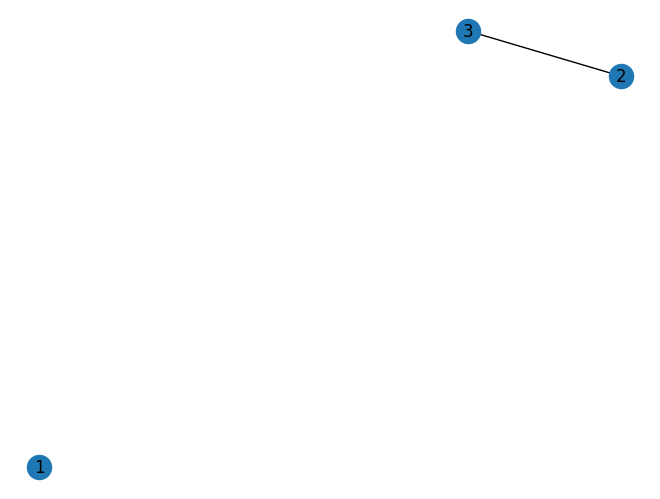

In [153]:
nx.draw(G,with_labels=True)

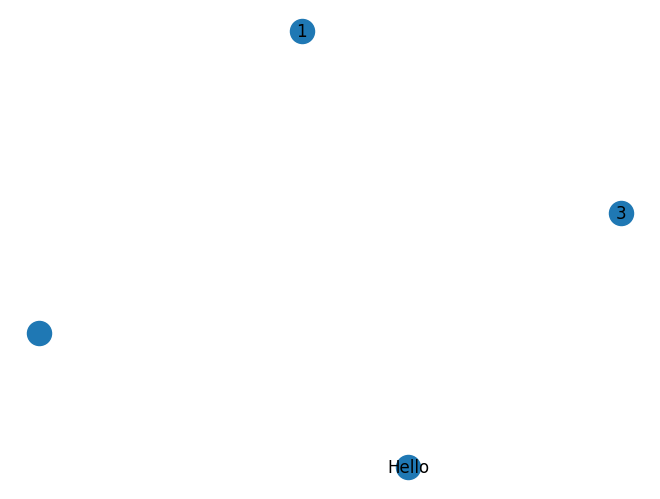

In [77]:
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
G.add_node(1)
G.add_node("Hello")
K3 = nx.Graph([(0, 1), (1, 2), (2, 0)])
G.add_node(K3)
G.add_node(1, size=10)
G.add_node(3, weight=0.4, UTM=("13S", 382871, 3972649))
G.number_of_nodes()
nx.draw(G,with_labels=True)

In [336]:
Y = 0
if Y:
    print(True)
else:
    print(False)

False
